In [1]:
import numpy as np
import pandas as pd

## Example: Counting Rainy Days

In [2]:
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv(r'C:\Users\RAC\Desktop\Data Science\Data\Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

In [3]:
## import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

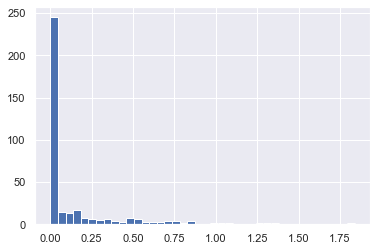

In [4]:
## plot histogram plt.hist()

plt.hist(inches, 40);

## Comparison Operators as ufuncs

In [5]:
x = np.array([1, 2, 3, 4, 5])

In [6]:
x < 3

array([ True,  True, False, False, False])

In [7]:
x > 3 # greater than

array([False, False, False,  True,  True])

In [8]:
x <= 3 # less than or equal

array([ True,  True,  True, False, False])

In [9]:
x >= 3 # greater than or equal

array([False, False,  True,  True,  True])

In [10]:
x != 3 # not equal

array([ True,  True, False,  True,  True])

In [11]:
x == 3 # equal

array([False, False,  True, False, False])

In [12]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [13]:
np.equal(x, 3)

array([False, False,  True, False, False])

In [14]:
## 2 dimentional

rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [15]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [16]:
np.less(x, 6)

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Working with Boolean Arrays

In [17]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

In [18]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [19]:
## np.sum; in this case, False is interpreted as 0, and True is interpreted as 1:

np.sum(x < 6)

8

In [20]:
## this summation can be done along rows or columns as well:

# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [21]:
## If we’re interested in quickly checking whether any or all the values are true, we can
## use (you guessed it) np.any() or np.all():

# are there any values greater than 8?
np.any(x>8)

True

In [22]:
# are there any values less than zero?
np.any(x < 0)

False

In [23]:
# are all values less than 10?
np.all(x < 10)

True

In [24]:
# are all values equal to 6?
np.all(x == 6)

False

In [25]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Boolean operators

#### all days with rain less than four inches,
#### or all days with rain greater than two inches.



In [26]:
### rainfall between 0.5 and 1.0 inches.

np.sum((inches > 0.5) & (inches < 1))

29

In [27]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [28]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) &
                                        (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


## Boolen Array as Mask

In [29]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [30]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [32]:
##Now to select these values from the array, we can simply index on this Boolean array;
## this is known as a masking operation:

x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [33]:
# construct a mask of all rainy days
rainy = (inches > 0)

In [39]:
rainy

array([False,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True,  True, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,

In [34]:
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)

In [40]:
summer

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
print("Median precip on rainy days in 2014 (inches): ",
        np.median(inches[rainy]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951


In [36]:
print("Median precip on summer days in 2014 (inches): ",
np.median(inches[summer]))

Median precip on summer days in 2014 (inches):  0.0


In [41]:
print("Maximum precip on summer days in 2014 (inches): ",
np.max(inches[summer]))

Maximum precip on summer days in 2014 (inches):  0.8503937007874016


In [42]:
print("Median precip on non-summer rainy days (inches):",
np.median(inches[rainy & ~summer]))

Median precip on non-summer rainy days (inches): 0.20078740157480315


### Using the Keywords and/or Versus the Operators &/|

In [43]:
### and or for entire object

bool(42), bool(0)

(True, False)

In [44]:
bool(42 and 0)

False

In [45]:
bool(42 or 0)

True

In [46]:
## When you use & and | on integers, the expression operates on the bits of the element,

bin(42)

'0b101010'

In [48]:
bin(59)

'0b111011'

In [49]:
bin(42 & 59)

'0b101010'

In [50]:
bin(42 | 59)

'0b111011'

In [52]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [54]:
A or B # wont work


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [56]:
(x > 4) and (x < 8) ## returns error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()